In [1]:
import pickle as pkl
import numpy as np
from tqdm import tqdm
from src.steinbrinker.BPDN import BPDN
import matplotlib.pyplot as plt
import skglm
import os

import os
os.environ["NUMBA_DISABLE_JIT"] = "1"

In [2]:
VALID_INP_SIGS = 362
INP_SMPL_FREQ = 250

inp_sigs = np.load('data/steinbrinker/testing_data_mvg_avg.npy')[:, :VALID_INP_SIGS]
dictionary = np.load('data/steinbrinker/dictionary_BW_real_data.npy')
bw = np.load('data/generated/BW_noise.npy')

file_name = 'BW_master_10000_2024-04-07-12-43-32.pkl'
with open(f'data/generated/{file_name}', 'rb') as handle:
    gen_data = pkl.load(handle)

In [3]:
gen_data_size = gen_data['params']['GEN_DATA_SIZE']
inp_smpl_freq = gen_data['params']['INP_SMPL_FREQ']
gen_sig_secs = gen_data['params']['GEN_SIG_SECS']
valid_inp_sigs = gen_data['params']['VALID_INP_SIGS']
gen_sig_cuts = np.int_(gen_data['data'])
gen_sig_len = inp_smpl_freq * gen_sig_secs
lambda_param = 0.001
max_iters = 20

In [4]:
start_idx = 0
end_idx = 1

In [5]:
alphas = np.zeros((end_idx - start_idx, dictionary.shape[1]))
for i in tqdm(range(end_idx - start_idx)):
    target = inp_sigs[gen_sig_cuts[1, start_idx+i]:gen_sig_cuts[1, start_idx+i]+gen_sig_len, gen_sig_cuts[0, start_idx+i]]
    noise = bw[gen_sig_cuts[2, start_idx+i]:gen_sig_cuts[2, start_idx+i]+gen_sig_len]
    alphas[i, :] = BPDN(target + noise, dictionary, lambda_param=lambda_param, max_iters=max_iters)[1]

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:13<00:00, 13.59s/it]


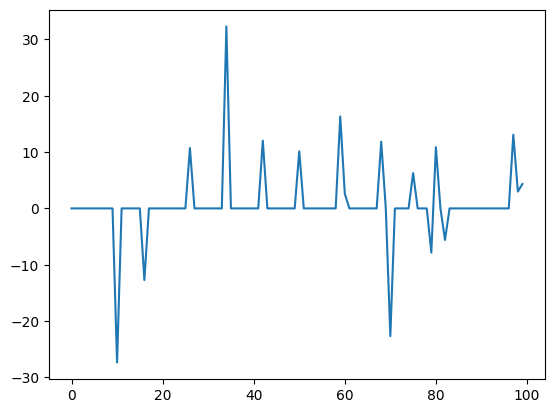

In [6]:
plt.plot(alphas[0])

In [7]:
fista = skglm.solvers.FISTA(max_iter=100, tol=0.0001, opt_strategy='subdiff', verbose=0)

In [8]:
l1_penalty = skglm.penalties.L1(alpha=.1)

In [9]:
quadratic_datafit = skglm.datafits.Quadratic()
# quadratic_datafit.Xty=dictionary.T@(target+noise)

In [10]:
fista.solve(dictionary, np.expand_dims(target, 0) + np.expand_dims(noise, 0), quadratic_datafit, l1_penalty)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mnon-precise type pyobject[0m
[0m[1mDuring: typing of argument at C:\Users\galig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skglm\solvers\common.py (47)[0m
[1m
File "..\..\..\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skglm\solvers\common.py", line 47:[0m
[1mdef dist_fix_point_cd(w, grad_ws, lipschitz, datafit, penalty, ws):
    <source elided>

[1m@njit
[0m[1m^[0m[0m 

This error may have been caused by the following argument(s):
- argument 4: [1mCannot determine Numba type of <class 'skglm.datafits.single_task.Quadratic'>[0m


In [ ]:
alphas_fista = np.zeros((end_idx - start_idx, dictionary.shape[1]))
for i in tqdm(range(end_idx - start_idx)):
    target = inp_sigs[gen_sig_cuts[1, start_idx+i]:gen_sig_cuts[1, start_idx+i]+gen_sig_len, gen_sig_cuts[0, start_idx+i]]
    noise = bw[gen_sig_cuts[2, start_idx+i]:gen_sig_cuts[2, start_idx+i]+gen_sig_len]
    alphas_fista[i, :] = fista.fit(dictionary, target + noise, datafit, l1_penalty)[1]

In [42]:
target.shape

(2500,)

In [43]:
dictionary.shape

(2500, 100)